In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import numpy as np

In [2]:
archivo = "../data_lake/business/precios-diarios.csv"
df = pd.read_csv(archivo)

In [3]:
df.head()

,fecha,precio
0,1995-07-20,1.409435
1,1995-07-21,4.924333
2,1995-07-22,1.269500
3,1995-07-23,0.953083
4,1995-07-24,4.305917


<AxesSubplot:xlabel='fecha'>

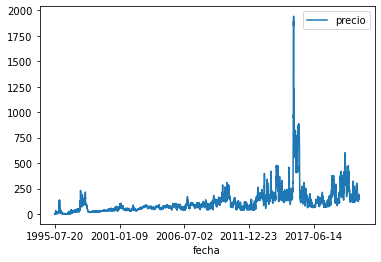

In [4]:
df.plot.line(x="fecha",y="precio")

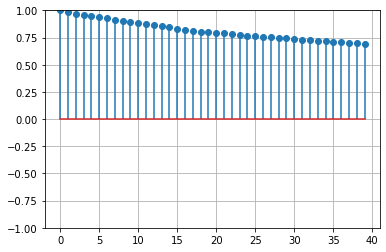

In [5]:
from statsmodels.tsa.stattools import acf, pacf


def acf_plot(z):
    acf_data = acf(z, fft=False)
    plt.stem(range(len(acf_data)), acf_data, use_line_collection=True)
    plt.ylim(-1, 1),
    plt.grid()


def pacf_plot(z):
    pacf_data = pacf(z)
    plt.stem(range(len(pacf_data)), pacf_data, use_line_collection=True)
    plt.ylim(-1, 1)
    plt.grid()


acf_plot(df["precio"])

In [6]:
data = list(df["precio"])

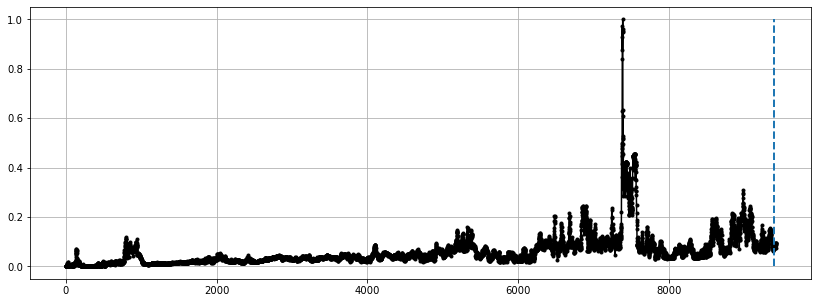

In [7]:
#
# Como primer paso se escala la serie al intervalo [0, 1]
# ya que esto facilita el entrenamiento del modelo
#
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# crea el transformador
scaler = MinMaxScaler()

# escala la serie
data_scaled = scaler.fit_transform(np.array(data).reshape(-1, 1))

# z es un array de listas como efecto
# del escalamiento
data_scaled = [u[0] for u in data_scaled]

plt.figure(figsize=(14, 5))
plt.plot(data_scaled, ".-k")
plt.grid()
plt.plot(
    [len(data_scaled) - 24, len(data_scaled) - 24],
    [min(data_scaled), max(data_scaled)],
    "--",
    linewidth=2,
);

In [8]:
P = 13

X = []
for t in range(P - 1, len(data) - 1):
    X.append([data_scaled[t - n] for n in range(P)])

observed_scaled = data_scaled[P:]

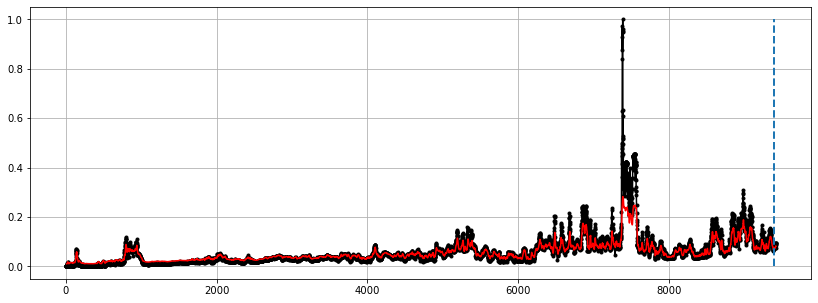

In [9]:
from sklearn.neural_network import MLPRegressor

np.random.seed(123456)

H = 1  # Se escoge arbitrariamente

mlp = MLPRegressor(
    hidden_layer_sizes=(H,),
    activation="logistic",
    learning_rate="adaptive",
    momentum=0.0,
    learning_rate_init=0.1,
    max_iter=10000,
)

# Entrenamiento
mlp.fit(X[0:215], observed_scaled[0:215])  # 239 - 24 = 215

# Pronostico
y_scaled_m1 = mlp.predict(X)

plt.figure(figsize=(14, 5))
plt.plot(data_scaled, ".-k")
plt.grid()

#
# No hay pronóstico para los primeros 13 valores
# de la serie
#
plt.plot([None] * P + y_scaled_m1.tolist(), "-r")

#
# linea vertical para dividir el entrenamiento
# del pronóstico. Se ubica en el ultimo dato
# usando para entrenamiento
#
plt.plot(
    [len(data_scaled) - 24, len(data_scaled) - 24],
    [min(data_scaled), max(data_scaled)],
    "--",
    linewidth=2,
);

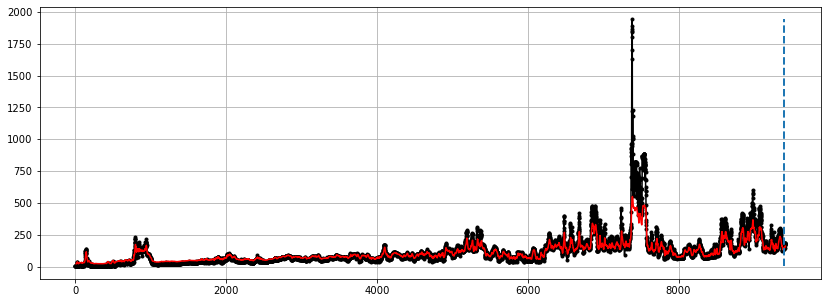

In [10]:
y_m1 = scaler.inverse_transform([[u] for u in y_scaled_m1])
y_m1 = [u[0] for u in y_m1]

plt.figure(figsize=(14, 5))
plt.plot(data, ".-k")
plt.grid()
plt.plot([None] * P + y_m1, "-r")
plt.plot([len(data) - 24, len(data) - 24], [min(data), max(data)], "--", linewidth=2);

In [23]:
y = np.transpose(np.array(df["fecha"][12:]))
x = np.transpose(np.array(data[12:]))
z = np.array(X)

In [28]:
np.concatenate((z,y,x))

ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 2 dimension(s) and the array at index 1 has 1 dimension(s)

In [29]:
z

array([[3.12597665e-04, 9.25071123e-05, 8.73582934e-05, ...,
        3.96308879e-04, 2.27811636e-03, 4.68358764e-04],
       [2.97451557e-04, 3.12597665e-04, 9.25071123e-05, ...,
        2.33391668e-04, 3.96308879e-04, 2.27811636e-03],
       [5.24214121e-04, 2.97451557e-04, 3.12597665e-04, ...,
        1.95970482e-03, 2.33391668e-04, 3.96308879e-04],
       ...,
       [9.33327468e-02, 9.67082267e-02, 9.34721940e-02, ...,
        8.62419651e-02, 8.20027709e-02, 7.54109956e-02],
       [9.02970891e-02, 9.33327468e-02, 9.67082267e-02, ...,
        8.24927669e-02, 8.62419651e-02, 8.20027709e-02],
       [8.48028703e-02, 9.02970891e-02, 9.33327468e-02, ...,
        8.94840047e-02, 8.24927669e-02, 8.62419651e-02]])

In [88]:
df

,fecha,precio
0,1995-07-20,1.409435
1,1995-07-21,4.924333
2,1995-07-22,1.269500
3,1995-07-23,0.953083
4,1995-07-24,4.305917
...,...,...
9412,2021-04-26,188.325833
9413,2021-04-27,181.770000
9414,2021-04-28,175.874167
9415,2021-04-29,165.203333


In [101]:
df2 = df.iloc[13: -13, :]

In [102]:
df2.index

RangeIndex(start=13, stop=9404, step=1)

In [109]:
def get_data(index,df,p):

    inicio = index - p
    final = index

    return list(df.iloc[inicio:final]["precio"])

In [108]:
r = df2.apply(lambda row :get_data(row.name,df2,13),axis=1)

0 13
13
1 14
13
2 15
13
3 16
13
4 17
13
5 18
13
6 19
13
7 20
13
8 21
13
9 22
13
10 23
13
11 24
13
12 25
13
13 26
13
14 27
13
15 28
13
16 29
13
17 30
13
18 31
13
19 32
13
20 33
13
21 34
13
22 35
13
23 36
13
24 37
13
25 38
13
26 39
13
27 40
13
28 41
13
29 42
13
30 43
13
31 44
13
32 45
13
33 46
13
34 47
13
35 48
13
36 49
13
37 50
13
38 51
13
39 52
13
40 53
13
41 54
13
42 55
13
43 56
13
44 57
13
45 58
13
46 59
13
47 60
13
48 61
13
49 62
13
50 63
13
51 64
13
52 65
13
53 66
13
54 67
13
55 68
13
56 69
13
57 70
13
58 71
13
59 72
13
60 73
13
61 74
13
62 75
13
63 76
13
64 77
13
65 78
13
66 79
13
67 80
13
68 81
13
69 82
13
70 83
13
71 84
13
72 85
13
73 86
13
74 87
13
75 88
13
76 89
13
77 90
13
78 91
13
79 92
13
80 93
13
81 94
13
82 95
13
83 96
13
84 97
13
85 98
13
86 99
13
87 100
13
88 101
13
89 102
13
90 103
13
91 104
13
92 105
13
93 106
13
94 107
13
95 108
13
96 109
13
97 110
13
98 111
13
99 112
13
100 113
13
101 114
13
102 115
13
103 116
13
104 117
13
105 118
13
106 119
13
107 120
13
108 121
1

In [92]:
def get_df_variables_explicativas(df,p=13):
    df_variables_explicativas = df.apply(lambda row : get_data(row.name,df,p),axis=1)
    df_variables_explicativas = df_variables_explicativas.to_frame()

    df_variables_explicativas = df_variables_explicativas.rename(columns={0 : "variables"})

    return df_variables_explicativas

In [93]:
get_df_variables_explicativas(df2,p=13)["variables"]

13      [1.0775000000000003, 1.517916666666667, 1.7860...
14      [1.517916666666667, 1.7860416666666667, 2.3837...
15      [1.7860416666666667, 2.3837916666666668, 2.387...
16      [2.3837916666666668, 2.387583333333334, 3.7072...
17      [2.387583333333334, 3.707208333333334, 6.65000...
                              ...                        
9412    [188.3258333333333, 181.77, 175.87416666666664...
9413    [181.77, 175.87416666666664, 165.2033333333332...
9414    [175.87416666666664, 165.20333333333326, 144.4...
9415              [165.20333333333326, 144.4891666666667]
9416                                  [144.4891666666667]
Name: variables, Length: 9404, dtype: object

In [48]:
df2.join(r2)

,fecha,precio,0
13,1995-08-02,1.077500,"[1.4094347826086957, 4.924333333333334, 1.2695..."
14,1995-08-03,1.517917,"[4.924333333333334, 1.2695000000000003, 0.9530..."
15,1995-08-04,1.786042,"[1.2695000000000003, 0.9530833333333332, 4.305..."
16,1995-08-05,2.383792,"[0.9530833333333332, 4.305916666666667, 1.1491..."
17,1995-08-06,2.387583,"[4.305916666666667, 1.1491666666666664, 1.1086..."
...,...,...,...
9412,2021-04-26,188.325833,"[154.6475000000001, 149.59166666666673, 146.96..."
9413,2021-04-27,181.770000,"[149.59166666666673, 146.96250000000006, 159.7..."
9414,2021-04-28,175.874167,"[146.96250000000006, 159.7649999999999, 167.99..."
9415,2021-04-29,165.203333,"[159.7649999999999, 167.9983333333333, 160.716..."
